<center>
In The Name Of God
<center>

# Author: **Ali Aramideh**

## Import needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Underestanding the Dataset

### Load the Dataset

In [2]:
url = 'https://github.com/AliAramideh/Regression_Emission_CO2/raw/main/FuelConsumptionCo2.csv'
dataset = pd.read_csv(url)
dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Define `FuelConsumptionCo2.csv`:

We have load a fuel consumption dataset, **`FuelConsumptionCo2.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Data Exploration

In [3]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Drop Unimportant Features

Accorfing to our domain expert:
- We know that FUEL CONSUMPTION COMB includes FUEL CONSUMPTION_CITY, FUEL CONSUMPTION_HWY, so we can skip them.
- We can drop MODELYEAR column because all of inputs have the same model year(2014)
- To simply we can regardless of the MODEL. If you think when we consider MAKE it is not necessary
- I think car brand is not important feature for emission co2, so we should drop MAKE feature.

In [4]:
data = dataset.drop(columns= ['MODELYEAR', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'MODEL', 'MAKE'])
data

,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,COMPACT,2.0,4,AS5,Z,8.5,196
1,COMPACT,2.4,4,M6,Z,9.6,221
2,COMPACT,1.5,4,AV7,Z,5.9,136
3,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...
1062,SUV - SMALL,3.0,6,AS6,X,11.8,271
1063,SUV - SMALL,3.2,6,AS6,X,11.5,264
1064,SUV - SMALL,3.0,6,AS6,X,11.8,271
1065,SUV - SMALL,3.2,6,AS6,X,11.3,260


### Convert categorical variables to dummy variables
For this porpuse we use one-hot encoding method

To simply we

In [5]:
categorical_columns = ['VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']
dummy_columns = pd.get_dummies(data[categorical_columns], dtype= float)
data = data.drop(columns= categorical_columns)
data = pd.concat([data, dummy_columns], axis= 1)
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,8.5,196,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,221,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,136,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,255,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,244,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,3.0,6,11.8,271,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1063,3.2,6,11.5,264,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1064,3.0,6,11.8,271,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1065,3.2,6,11.3,260,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### *Diagrams* just for numerical variables

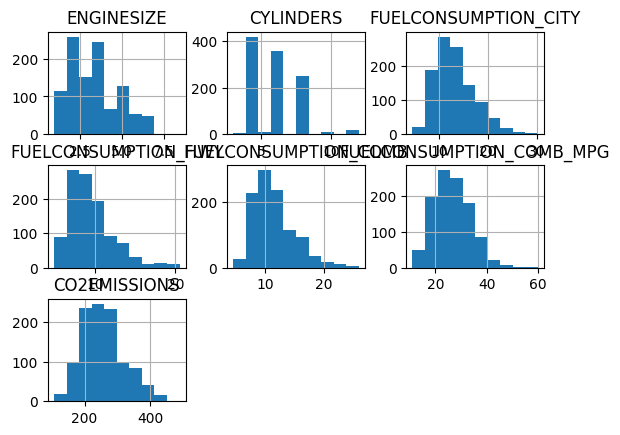

In [6]:
dataset.drop(columns= ['MODELYEAR']).hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

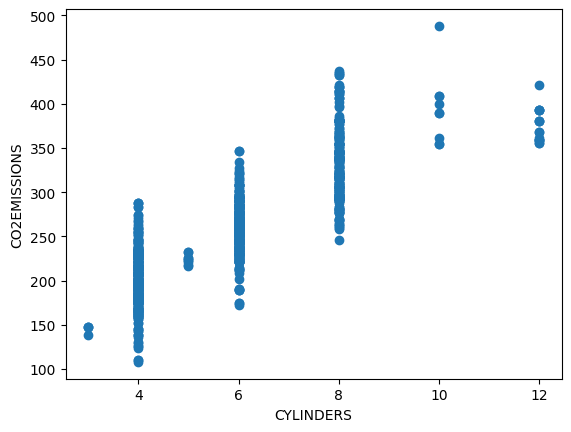

In [7]:
# Based on CYLINDER number
plt.scatter(data.CYLINDERS, data.CO2EMISSIONS)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

For CYLENDER, we can see when number of cylender increase, the emission of co2 will increase. Of course we expected.

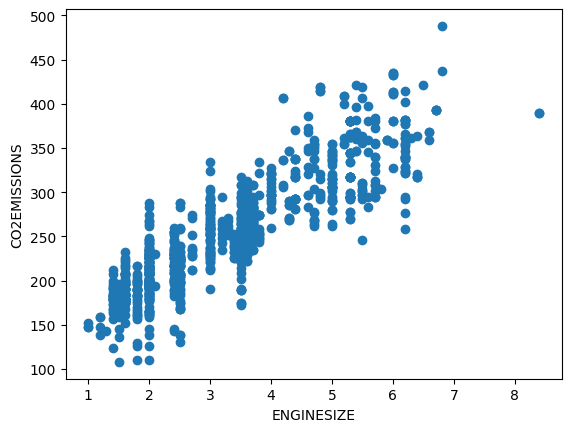

In [8]:
# Based on ENGINESIZE
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In this case the same of previouse case when the enginsize increase, emission of co2 will increase.

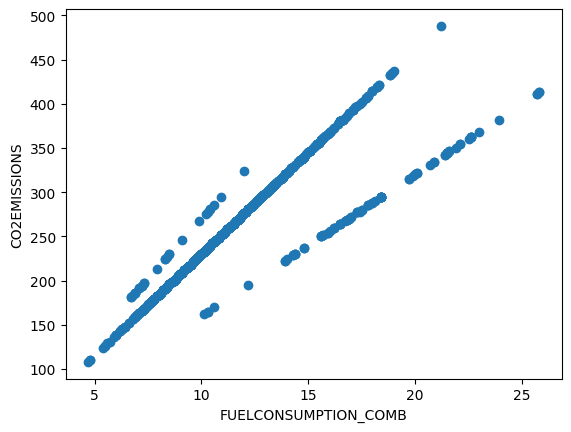

In [9]:
# Based on FUELCONSUMPTION_COMB
plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

The same previous case.

Correlation for all variables

In [10]:
correlation = data.corr()
correlation

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
ENGINESIZE,1.000000,0.934011,0.819482,0.874154,-0.256566,0.122410,-0.103808,-0.040585,0.004957,-0.002233,...,-0.056443,-0.074970,0.005767,-0.218287,-0.164512,0.035361,-0.093400,0.237674,-0.266920,0.165557
CYLINDERS,0.934011,1.000000,0.776788,0.849685,-0.230809,0.160301,-0.108392,-0.011067,-0.005164,-0.047178,...,-0.070970,-0.068545,0.006066,-0.211780,-0.155672,0.021945,-0.067955,0.194920,-0.339827,0.256011
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129,-0.260591,0.049157,-0.210401,-0.082459,0.026637,0.023799,...,-0.093183,-0.091007,-0.035271,-0.177391,-0.152916,-0.017731,-0.145396,0.583125,-0.303950,0.022451
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000,-0.273466,0.053392,-0.210129,-0.070066,0.007125,0.047180,...,-0.101439,-0.104023,-0.036238,-0.194875,-0.126364,-0.007613,-0.072371,0.169045,-0.230304,0.160804
VEHICLECLASS_COMPACT,-0.256566,-0.230809,-0.260591,-0.273466,1.000000,-0.129798,-0.196161,-0.094103,-0.050548,-0.046754,...,0.005723,0.044560,0.024857,0.101599,0.152562,-0.040433,0.010510,-0.080181,-0.060479,0.103974
VEHICLECLASS_FULL-SIZE,0.122410,0.160301,0.049157,0.053392,-0.129798,1.000000,-0.132487,-0.063557,-0.034140,-0.031578,...,-0.030219,-0.020316,-0.015722,-0.064261,-0.095204,-0.027308,-0.025785,0.031704,-0.051183,0.042190
VEHICLECLASS_MID-SIZE,-0.103808,-0.108392,-0.210401,-0.210129,-0.196161,-0.132487,1.000000,-0.096052,-0.051595,-0.047723,...,-0.020782,0.042915,0.071191,-0.060732,0.040664,-0.041270,0.055956,-0.083717,0.071708,-0.042993
VEHICLECLASS_MINICOMPACT,-0.040585,-0.011067,-0.082459,-0.070066,-0.094103,-0.063557,-0.096052,1.000000,-0.024751,-0.022894,...,-0.021909,-0.014729,-0.011398,0.085619,-0.016330,0.379724,-0.034587,-0.065939,-0.124686,0.175564
VEHICLECLASS_MINIVAN,0.004957,-0.005164,0.026637,0.007125,-0.050548,-0.034140,-0.051595,-0.024751,1.000000,-0.012297,...,-0.011768,-0.007912,-0.006123,-0.025026,-0.020674,-0.010635,-0.018579,0.052607,0.070150,-0.095476
VEHICLECLASS_PICKUP TRUCK - SMALL,-0.002233,-0.047178,0.023799,0.047180,-0.046754,-0.031578,-0.047723,-0.022894,-0.012297,1.000000,...,-0.010885,-0.007318,-0.005663,0.105488,0.037116,-0.009837,-0.017184,-0.032761,0.110623,-0.088309


Plot correlation matrix just for numerical variables

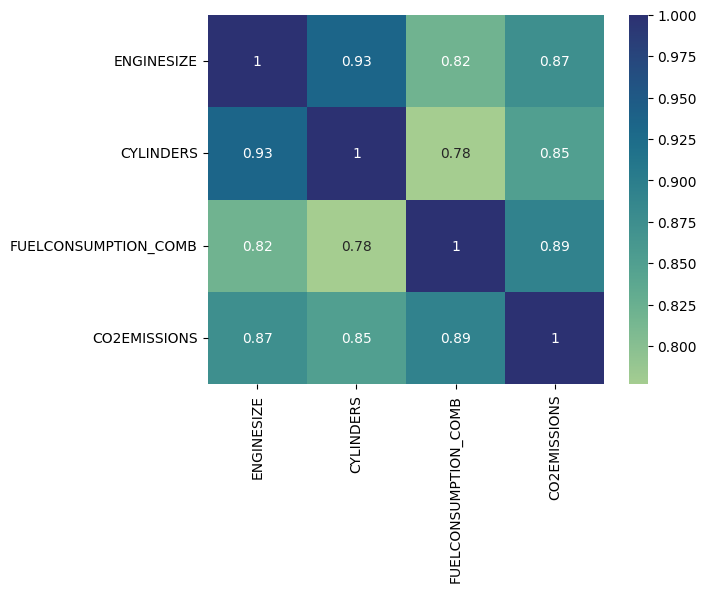

In [11]:
corr_num = data[['ENGINESIZE', 	'CYLINDERS', 'FUELCONSUMPTION_COMB',	'CO2EMISSIONS']].corr()
ax = sns.heatmap(corr_num, annot=True, cmap="crest")

As you see all of our variables have strong correlation with emission of co2.

### **Creating** train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop(columns= ['CO2EMISSIONS'])
y = data['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

## Simple Linear Regression


### Modeling

Using sklearn package to model data.

In [13]:
from sklearn import linear_model
model_simple_lin_reg = linear_model.LinearRegression()
train_x_simple_lin = np.asanyarray(X_train[['ENGINESIZE']])
train_y = np.asanyarray(y_train)
model_simple_lin_reg.fit(train_x_simple_lin, train_y)

print('Coefficient: ', model_simple_lin_reg.coef_)
print('Intercept: ', model_simple_lin_reg.intercept_)

Coefficient:  [39.49194765]
Intercept:  124.3756666252396


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

### Plot output

We can plot the fit line over the data:

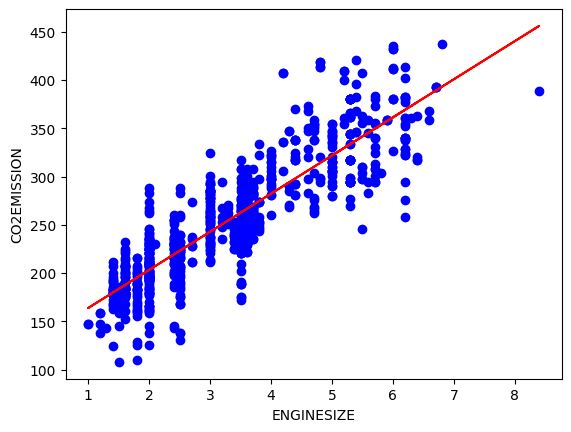

In [14]:
plt.scatter(X_train.ENGINESIZE, y_train, color= 'blue')
plt.plot(train_x_simple_lin, model_simple_lin_reg.coef_ * train_x_simple_lin + model_simple_lin_reg.intercept_, color= 'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
test_y = np.asanyarray(y_test)
test_x_simple_lin = np.asanyarray(X_test[['ENGINESIZE']])
pred_y_simple_lin = model_simple_lin_reg.predict(test_x_simple_lin)

print('Mean Square Error(MSE): %.2f' %mean_squared_error(test_y, pred_y_simple_lin))
print('R2 score: %.2f' %r2_score(y_test, pred_y_simple_lin))

Mean Square Error(MSE): 893.27
R2 score: 0.78


0.75 for R2 score is not bad but it can be better. Nex step we calculate polynomial regression and we hope that the R2 score will increse.

## Polynomial Regression

### Modeling

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = w_0 + w_1  x + w_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2)
train_x_poly = poly.fit_transform(train_x_simple_lin)

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v_1\\\\
v_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
 1 & v\_1 & v\_1^2\\\\
\ 1 & v_2 & v_2^2\\\\
\vdots & \vdots & \vdots\\\\
\ 1 & v_n & v_n^2
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\\\
2.4\\\\
1.5\\\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
 1 & 2. & 4.\\\\
 1 & 2.4 & 5.76\\\\
 1 & 1.5 & 2.25\\\\
\vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$


In [17]:
# Please consider to this cell outputs and match up to the top cell
print(train_x_simple_lin[:3])
train_x_poly[:3]

[[5. ]
 [5.3]
 [3.5]]


array([[ 1.  ,  5.  , 25.  ],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  3.5 , 12.25]])

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does.
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$$y = w_0 + w_1  x_1 + w_2 x_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.

so we can use **LinearRegression()** function to solve it:


In [18]:
from sklearn import linear_model

model_poly_reg = linear_model.LinearRegression()
model_poly_reg.fit(train_x_poly, train_y)

# The coefficient
print('Coefficient:' , model_poly_reg.coef_)
print('Intercept: %.2f' % model_poly_reg.intercept_)

Coefficient: [ 0.         51.4755613  -1.61653829]
Intercept: 105.57


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


### Plot output

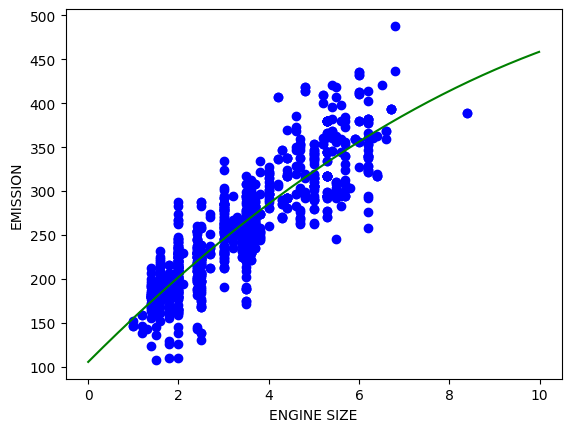

In [19]:
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, color= 'blue')
x_for_plot_poly = np.arange(0, 10, 0.01)
plt.plot(x_for_plot_poly, model_poly_reg.intercept_ + model_poly_reg.coef_[1] * x_for_plot_poly +
         model_poly_reg.coef_[2] * np.power(x_for_plot_poly, 2), color= 'green')
plt.xlabel('ENGINE SIZE')
plt.ylabel('EMISSION')
plt.show()

### Evaluation

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

test_x_poly = poly.fit_transform(test_x_simple_lin)
pred_y_poly = model_poly_reg.predict(test_x_poly)

print('MSE: %.2f' % mean_squared_error(pred_y_poly, test_y))
print('R2 Score: %.2f' % r2_score(pred_y_poly, test_y))

MSE: 887.39
R2 Score: 0.73


Unfortunately R2 score decreased. We can use multiple linear regression and we hope that the R2 score will increase

## Multiple Linear Regression

### Mideling

In reality, there are multiple variables that impact the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [21]:
from sklearn import linear_model

model_multiple_lin_reg = linear_model.LinearRegression()
model_multiple_lin_reg.fit(X_train, y_train)
# If you do not know X_train and y_train, please observe Creating train and
# test dataset cell.
coefficients = pd.DataFrame({'Feature': X_train.columns,
                             'Coefficient': model_multiple_lin_reg.coef_})
coefficients

,Feature,Coefficient
0,ENGINESIZE,0.685542
1,CYLINDERS,1.155955
2,FUELCONSUMPTION_COMB,21.264511
3,VEHICLECLASS_COMPACT,0.296410
4,VEHICLECLASS_FULL-SIZE,1.612657
5,VEHICLECLASS_MID-SIZE,-0.645110
6,VEHICLECLASS_MINICOMPACT,-0.898599
7,VEHICLECLASS_MINIVAN,2.729151
8,VEHICLECLASS_PICKUP TRUCK - SMALL,3.826606
9,VEHICLECLASS_PICKUP TRUCK - STANDARD,2.229055


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


### Evaluation

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

pred_y_multiple_lin = model_multiple_lin_reg.predict(X_test)

print('MSE: %.2f' % mean_squared_error(pred_y_multiple_lin, y_test))
print('R2 Score: %.2f' % r2_score(y_test, pred_y_multiple_lin))

MSE: 36.80
R2 Score: 0.99


This amount is so great!

**Explained variance regression score:**\
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.
